# Section Two - Plotting Spatial Data

In section two of this textbook, you will learn how to create and customize plots of spatial data (including vector and raster data) using Python.
Learning Objectives

After completing this section of the Scientist’s Guide to Plotting Data in Python online textbook, you will be able to:

    Create a map containing multiple vector datasets, colored by unique attributes in Python.
    Add a custom legend to a map of vector data in Python with unique colors.
    Visually “clip” or zoom in to a particular spatial extent in a plot.
    Create interactive map in Jupyter Notebook using the folium package for Python.
    Overlay two rasters in Python to create a plot.
    Overlay a raster on an interactive map created with folium.
    Customize a raster map in Python using matplotlib.

# Lesson 1. Customize your Maps in Python using Matplotlib: GIS in Python    

# Learning Objectives

After completing this chapter, you will be able to:

    Create a map containing multiple vector datasets, colored by unique attributes in Python.
    Add a custom legend to a map in Python with unique colors.
    Visually “clip” or zoom in to a particular spatial extent in a plot.
    Create interactive plots of vector data using folium in Python and Jupyter Notebook.
    
# What You Need

You need Python and Jupyer Notebook to complete this chapter. You should also have an earth-analytics directory setup on your computer with a data subdirectory within it. You should have completed the lesson on Setting Up the Earth Analytics Python Conda Environment..

You will need a computer with internet access to complete this lesson and the spatial-vector-lidar dataset.    


# Lesson 2. Customize Map Legends and Colors in Python using Matplotlib: GIS in Python
## Learning Objectives

    Create a map containing multiple vector datasets, colored by unique attributes in Python.
    Add a custom legend to a map in Python with subheadings, unique colors.
    
## Create Custom Maps with Python

In this lesson, you will learn how to customize map symbology or the colors and symbols used to represent vector data in Python. There are many different ways to create maps in Python. In this lesson, you will use the geopandas and matplotlib.

To begin, import all of the required libraries.    

In [6]:
# Import libraries
import os
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
import geopandas as gpd
import earthpy as et
from earthpy import clip as cl

In [9]:

# Get the data & set working dir
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

## Downloading from https://ndownloader.figshare.com/files/12459464
# Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.

# Import Data

Next, import and explore your spatial data. In this case you are importing the same roads layer that you used in earlier lessons which is stored in shapefile (.shp) format.

In [11]:
# Import roads shapefile
sjer_roads_path = os.path.join("data", "spatial-vector-lidar", 
                               "california", "madera-county-roads", 
                               "tl_2013_06039_roads.shp")

sjer_roads = gpd.read_file(sjer_roads_path)

# View data type
print(type(sjer_roads['RTTYP']))

#<class 'pandas.core.series.Series'>
# View unique attributes for each road in the data
print(sjer_roads['RTTYP'].unique())



<class 'pandas.core.series.Series'>
['M' None 'S' 'C']


# Replace Missing Data Values

It looks like you have some missing values in your road types. You want to plot all road types even those that are set to None - which is python’s default missing data value. Change the roads with an RTTYP attribute of None to “unknown”.

 **Data Tip: There are many different ways to deal with missing data in Python. Another way to replace all values of None is to use the .isnull() function like this: sjer_roads.loc[sjer_roads['RTTYP'].isnull(), 'RTTYP'] = 'Unknown'** 

In [12]:
# Map each value to a new value
sjer_roads['RTTYP'].replace(np.nan, 'Unknown', inplace=True)

print(sjer_roads['RTTYP'].unique())


['M' 'Unknown' 'S' 'C']


If you plot your data using the standard geopandas .plot(), geopandas will select colors for your lines. You can add a legend using the legend=True argument however notice that the legend is composed of circles representing each line type rather than a line. You also don’t have full control over what color is applied to which line, line width and other symbology attributes.

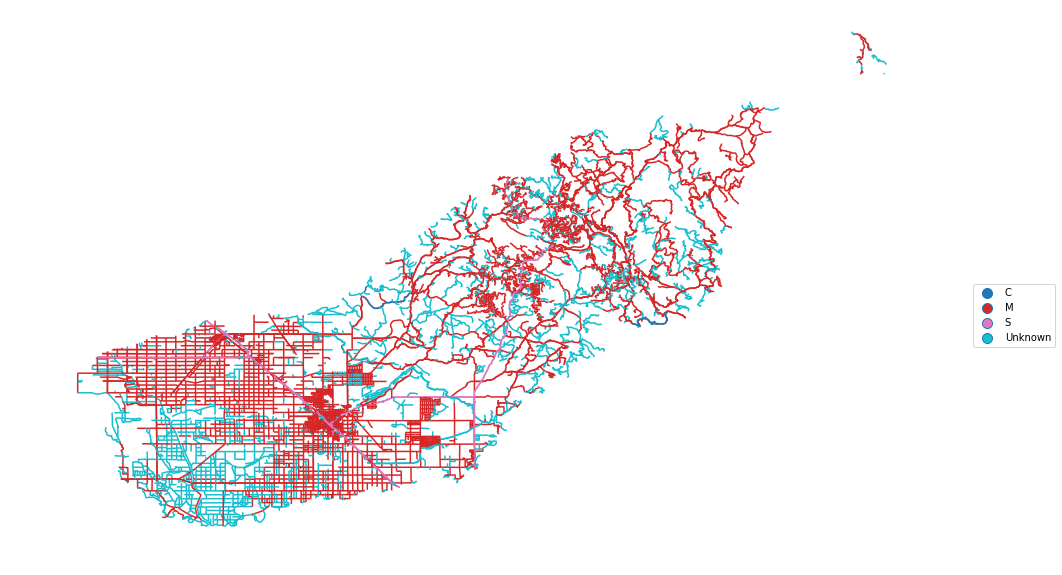

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))

sjer_roads.plot(column='RTTYP',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

ax.set_axis_off()

plt.show()


# Plot Color by Attribute

To plot a vector layer by attribute value so each road layer is colored according to it’s respective attribute value, and so the legend also represents that same symbology you need to do three things.

    You need to create a dictionary that associates a particular color with a particular attribute value
    You then need to loop through and apply that color to each attribute value
    Finally you need to add a label argument to your plot so you can call ax.legend() to make your final legend.

To begin, create a dictionary that defines what color you want each road type to be plotting using.

In [15]:
# Create a dictionary where you assign each attribute value to a particular color
roadPalette = {'M': 'blue',
               'S': 'green',
               'C': 'purple',
               'Unknown': 'grey'}
roadPalette

{'M': 'blue', 'S': 'green', 'C': 'purple', 'Unknown': 'grey'}

Next, you loop through each attribute value and plot the lines with that attribute value using the color specified in the dictionary. To ensure your legend generates properly, you add a label= argument to your plot call. The label value will be the attribute value that you used to plot. Below that value is defined by the ctype variable.

Then you can call ax.legend() to create a legend.

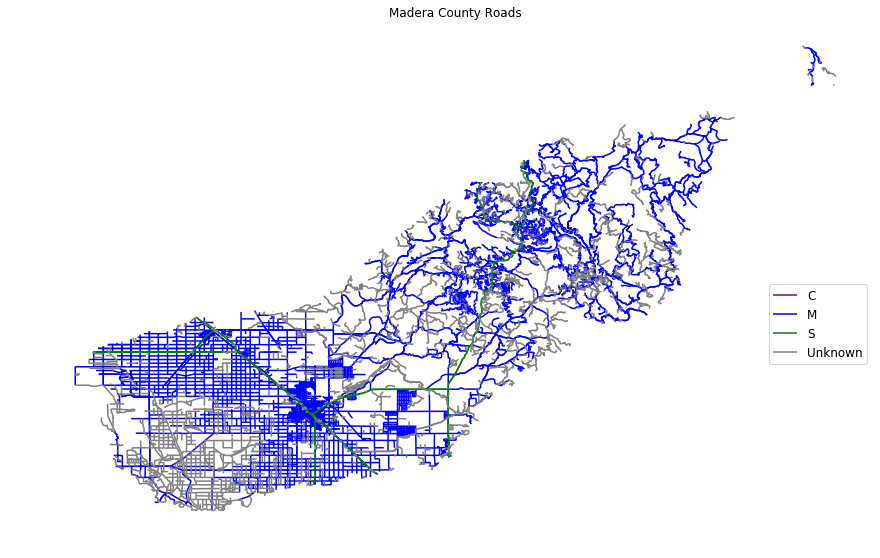

In [18]:
# Plot data
fig, ax = plt.subplots(figsize=(15, 15))

# Loop through each attribute type and plot it using the colors assigned in the dictionary
for ctype, data in sjer_roads.groupby('RTTYP'):
    
    # Define the color for each group using the dictionary
    color = roadPalette[ctype]
    
    # Plot each group using the color defined above
    data.plot(color=color,
              ax=ax,
              label=ctype)

ax.legend(bbox_to_anchor=(1.0, .5), prop={'size': 12})
ax.set(title='Madera County Roads')

ax.set_axis_off()
plt.show()


# Adjust Line Width

You can adjust the width of your plot lines using the linewidth= attribute. If you set the linewidth to 4, you can create a truly ugly plot. In this example every line is width=4

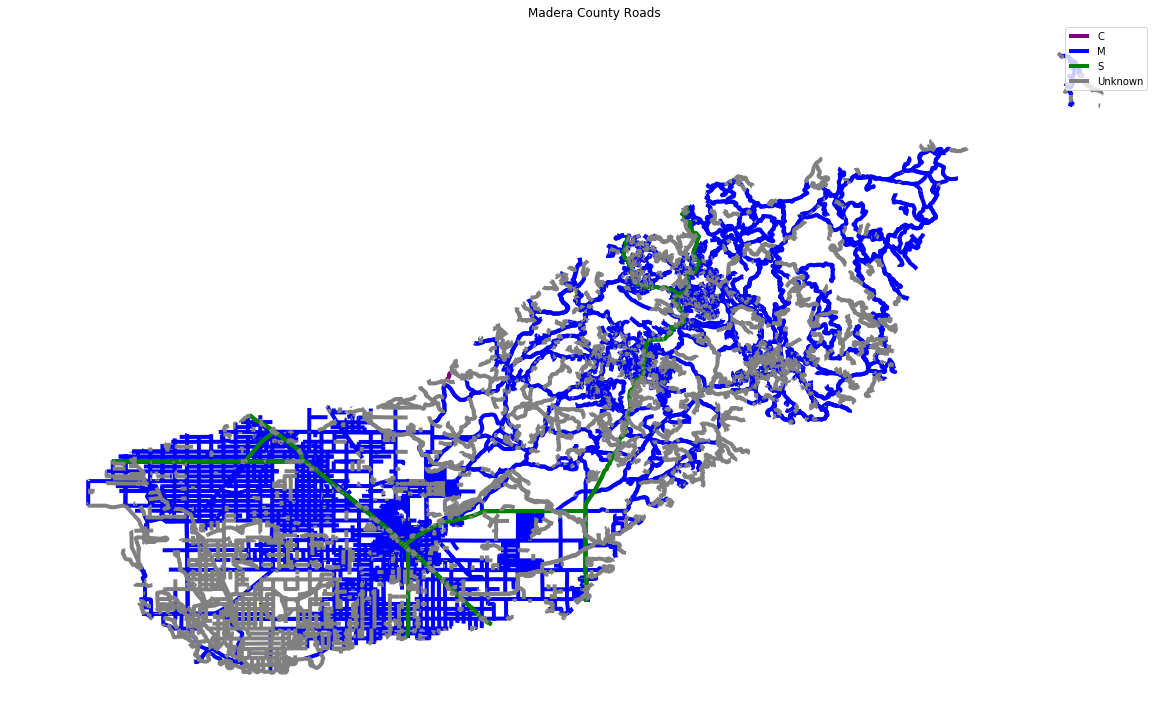

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))

# Loop through each group (unique attribute value) in the roads layer and assign it a color
for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    data.plot(color=color,
              ax=ax,
              label=ctype,
              linewidth=4)  # Make all lines thicker

# Add title and legend to plot
ax.legend()
ax.set(title='Madera County Roads')
ax.set_axis_off()

plt.show()


# Adjust Line Width by Attribute

Similar to how you adjust colors, you can create a dictionary to adjust line widths. Then you can call dictionaryName[ctype] where dictionaryName is a dictionary of what line width you want to assign to each attribute value and ctype is the attribute value.

lineWidths = {'M': 1, 'S': 1, 'C': 4, 'Unknown': .5}

Here you are assigning the linewidth of each respective attibute value a line width as follows:

    M: 1
    S: 1
    C: 4
    Unknown = 4

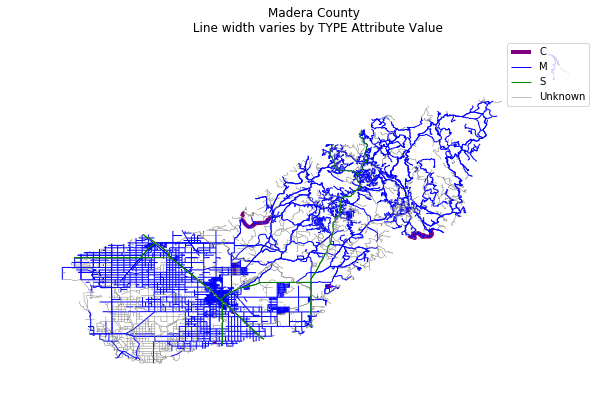

In [21]:
# Create dictionary to map each attribute value to a line width
lineWidths = {'M': 1, 'S': 1, 'C': 4, 'Unknown': .5}

# Plot data adjusting the linewidth attribute
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_axis_off()

for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]    
    data.plot(color=color,
              ax=ax,
              label=ctype,
              
              # Assign each group to a line width using the dictionary created above
              linewidth=lineWidths[ctype])

ax.legend()
ax.set(title='Madera County \n Line width varies by TYPE Attribute Value')
plt.show()


# Customize Plot Legend

Above you created a legend using the label= argument and ax.legend(). You may want to move your legend around to make a cleaner map. You can use the loc= argument in the call to ax.legend() to adjust your legend location. This location can be numeric or descriptive.

Below you specify the loc= to be in the lower right hand part of the plot.

ax.legend(loc='lower right')

When you add a legend, you use the following elements to customize legend labels and colors:

    loc=(how-far-right, how-far-above-0): specify an x and Y location of the plot Or generally specify the location e.g. ‘bottom right’, ‘top’, ‘top right’, etc. If you use numeric values the first value is the position to the RIGHT of the plot and the second is the vertical position (how far above 0). Otherwise you can provide text for example “lower right” or “upper left”.
    fontsize: the size of the fonts used in the legend
    frameon: Boolean Values: True of False - if you want a box around your legend use True

The bbox_to_anchor=(1, 1) argument is also often helpful to customization the location further. Read more about that argument here in the matplotlib documentation.

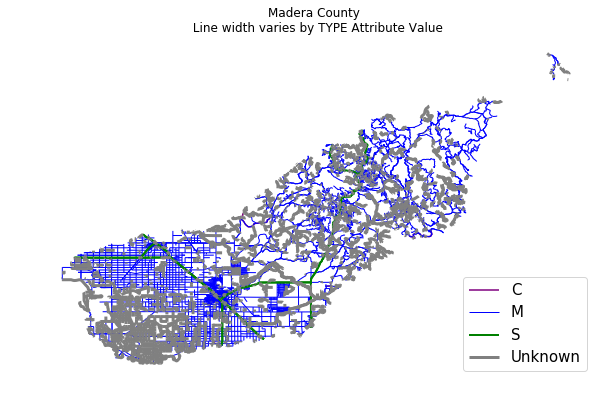

In [22]:
lineWidths = {'M': 1, 'S': 2, 'C': 1.5, 'Unknown': 3}

fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each attribute value and assign each 
# with the correct color & width specified in the dictionary
for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype    
    data.plot(color=color,
              ax=ax,
              linewidth=lineWidths[ctype],
              label=label)


ax.set(title='Madera County \n Line width varies by TYPE Attribute Value')

# Place legend in the lower right hand corner of the plot
ax.legend(loc='lower right',
          fontsize=15,
          frameon=True)

ax.set_axis_off()
plt.show()


See what happens when you set the frameon attribute of your legend to False and adjust the line widths - does your legend change? Also notice below the loc=() argument is given a tuple - two numbers that define the x and y location of the legend relative to the plot figure region.

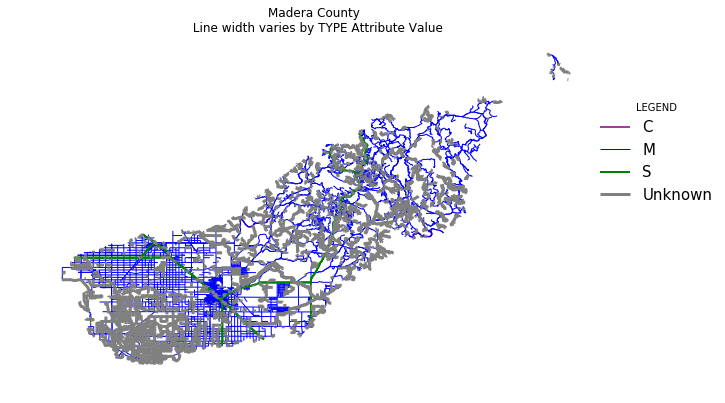

In [23]:
lineWidths = {'M': 1, 'S': 2, 'C': 1.5, 'Unknown': 3}

fig, ax = plt.subplots(figsize=(10, 10))

for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype
    data.plot(color=color,
              ax=ax,
              linewidth=lineWidths[ctype],
              label=label)

ax.set(title='Madera County \n Line width varies by TYPE Attribute Value')
ax.legend(loc=(1, .5),
          fontsize=15,
          frameon=False,
          title="LEGEND")

ax.set_axis_off()
plt.show()


Now, adjust both the plot colors and line widths.

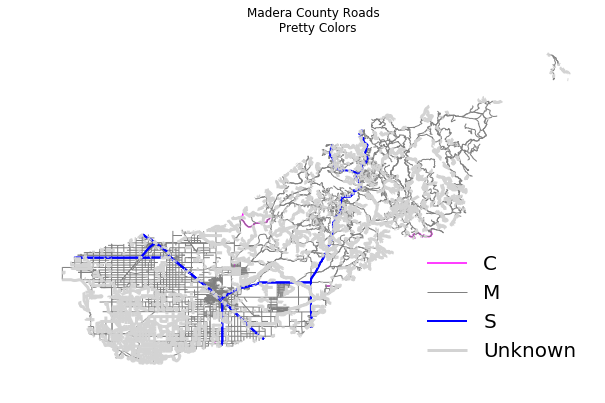

In [24]:
roadPalette = {'M': 'grey', 'S': "blue",
               'C': "magenta", 'Unknown': "lightgrey"}

lineWidths = {'M': 1, 'S': 2, 'C': 1.5, 'Unknown': 3}

fig, ax = plt.subplots(figsize=(10, 10))

for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype
    
    data.plot(color=color,
              ax=ax,
              linewidth=lineWidths[ctype],
              label=label)
    
ax.set(title='Madera County Roads \n Pretty Colors')

ax.legend(loc='lower right',
          fontsize=20,
          frameon=False)

ax.set_axis_off()

plt.show()


# Plot Lines by Attribute

Play with colors one more time. Create a plot that emphasizes only roads designated as C or S (County or State). To emphasize these types of roads, make the lines that are assigned the RTTYP attribute of C or S, THICKER than the other lines.

Be sure to add a title and legend to your map! You might consider a color palette that has all County and State roads displayed in a bright color. All other lines can be grey.

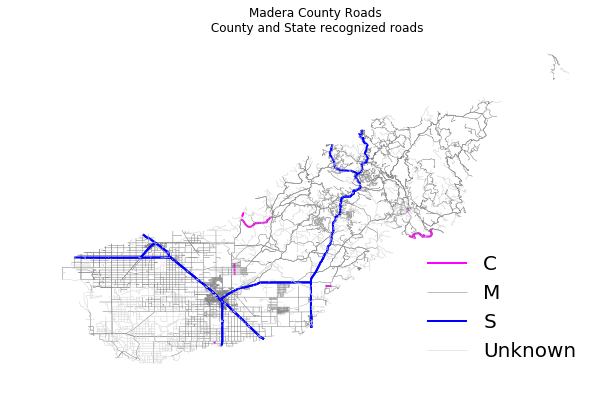

In [25]:
# Define colors and line widths
roadPalette = {'M': 'grey', 'S': "blue",
               'C': "magenta", 'Unknown': "lightgrey"}

lineWidths = {'M': .5, 'S': 2, 'C': 2, 'Unknown': .5}

fig, ax = plt.subplots(figsize=(10, 10))

for ctype, data in sjer_roads.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype
    
    data.plot(color=color,
              ax=ax,
              linewidth=lineWidths[ctype],
              label=label)
    
ax.set(title='Madera County Roads\n County and State recognized roads')

ax.legend(loc='lower right',
          fontsize=20,
          frameon=False)

ax.set_axis_off()
plt.show()


 # Add a Point Shapefile to your Map

Next, add another layer to your map to see how you can create a more complex map with a legend that represents both layers. You will add the same SJER_plot_centroids shapefile that you worked with in previous lessons to your map.

If you recall, this layer contains 3 plot_types: grass, soil and trees.

In [26]:
# Import points layer
sjer_plots_path = os.path.join("data", "spatial-vector-lidar", 
                               "california", "neon-sjer-site", 
                               "vector_data", "SJER_plot_centroids.shp")

sjer_plots = gpd.read_file(sjer_plots_path)

# View first 5 rows
sjer_plots.head(5)


,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.76 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)


Just like you did above, create a dictionary that specifies the colors associated with each plot type. Then you can plot your data just like you did with the lines

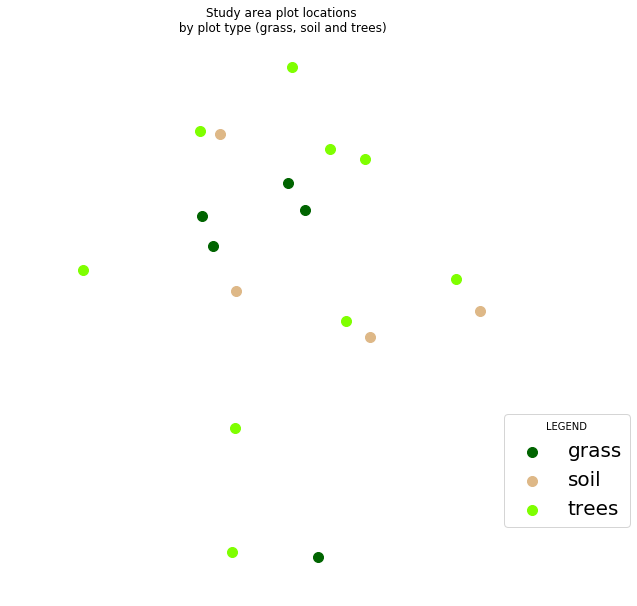

In [27]:
pointsPalette = {'trees': 'chartreuse',
                 'grass': 'darkgreen', 'soil': 'burlywood'}

lineWidths = {'M': .5, 'S': 2, 'C': 2, 'Unknown': .5}

fig, ax = plt.subplots(figsize=(10, 10))

for ctype, data in sjer_plots.groupby('plot_type'):
    color = pointsPalette[ctype]
    label = ctype
    data.plot(color=color,
              ax=ax,
              label=label,
              markersize=100)
    
ax.set(title='Study area plot locations\n by plot type (grass, soil and trees)')

ax.legend(fontsize=20,
          frameon=True,
          loc=(1, .1),
          title="LEGEND")

ax.set_axis_off()
plt.show()


# Overlay points on top of roads

Next, plot the plot data on top of the roads layer. Then create a custom legend that contains both lines and points.

NOTE: In this example, the projection for the roads layer has to match the projection of the SJER plot locations.

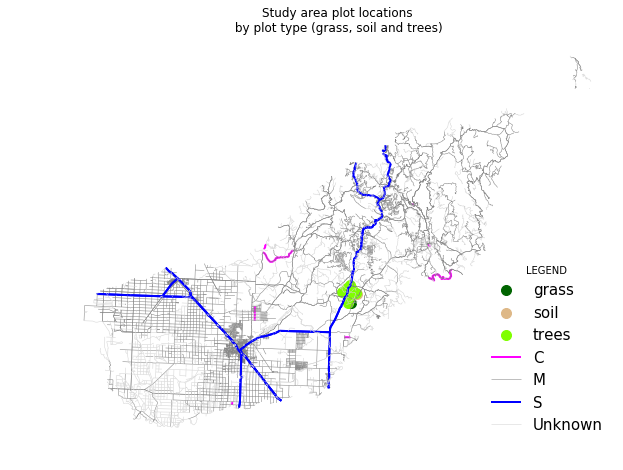

In [28]:
# Reproject the data
sjer_roads_utm = sjer_roads.to_crs(sjer_plots.crs)

fig, ax = plt.subplots(figsize=(10, 10))

for ctype, data in sjer_plots.groupby('plot_type'):
    color = pointsPalette[ctype]
    label = ctype
    data.plot(color=color,
              ax=ax,
              label=label,
              markersize=100)
    
for ctype, data in sjer_roads_utm.groupby('RTTYP'):
    color = roadPalette[ctype]
    label = ctype    
    data.plot(color=color,
              ax=ax,
              linewidth=lineWidths[ctype],
              label=label)
    
ax.set(title='Study area plot locations\n by plot type (grass, soil and trees)')

ax.legend(fontsize=15,
          frameon=False,
          loc=('lower right'),
          title="LEGEND")

ax.set_axis_off()
plt.show()


# Lesson 3. Customize Map Extents in Python: GIS in Python
### Learning Objectives

    Visually “clip” or zoom in to a particular spatial extent in a plot.
Import Packages and Data

Begin by importing the necessary packages including geopandas to import the vector data and matplotlib to create the map.    

In [34]:
# Import libraries
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
# Get the data & set working dir
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Read in necessary files 
data_path = os.path.join("data", "spatial-vector-lidar")

sjer_aoi = gpd.read_file(os.path.join(data_path, "california" , 
                                      "neon-sjer-site", 
                                      "vector_data", "SJER_crop.shp"))

country_boundary_us = gpd.read_file(os.path.join(data_path, "usa", 
                                                 "usa-boundary-dissolved.shp"))

ne_roads = gpd.read_file(os.path.join(data_path, "global", 
                                      "ne_10m_roads", "ne_10m_n_america_roads.shp"))


# Change the Spatial Extent of a Plot in Python

Sometimes you modify your data by clipping it to a specified boundary. This is useful when you want to:

    Make your data smaller to speed up processing and reduce file size.
    Make analysis simpler and faster given less data to work with.

However, if you just want to plot the data, you can consider adjusting the spatial extent of a plot to “zoom in”.

Note that zooming in on a plot does not change your data in any way - it just changes how your plot renders!

To zoom in on a region of your plot, you first need to grab the spatial extent of the object

In [36]:
# Get spatial extent  - to zoom in on the map rather than clipping
aoi_bounds = sjer_aoi.geometry.total_bounds
aoi_bounds

array([ 254570.567     , 4107303.07684455,  258867.40933092,
       4112361.92026107])

The total_bounds attribute represents the total spatial extent for the aoi layer. This is the total external boundary of the layer - thus if there are multiple polygons in the layer it will take the furtherst edge in the north, south, east and west directions to create the spatial extent box.
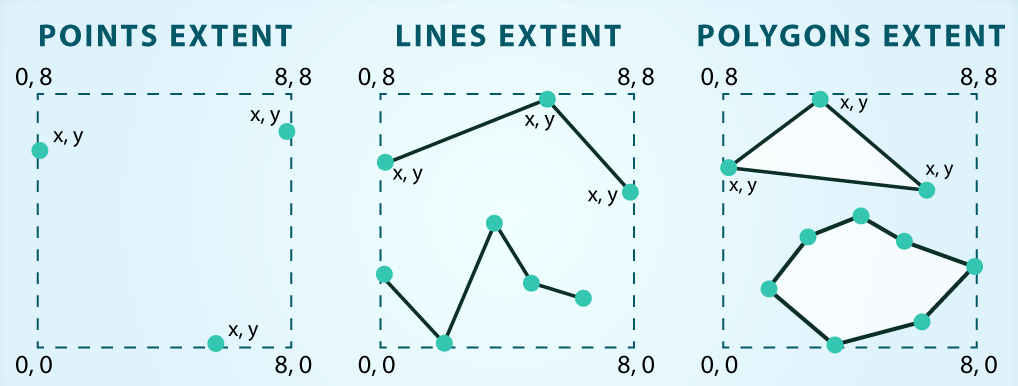

The spatial extent of a shapefile or Python spatial object like a geopandas geodataframe represents the geographic edge or location that is the furthest north, south, east and west. This is the overall geographic coverage of the spatial object. Source: National Ecological Observatory Network (NEON)

The object that is returned is a tuple - a non editable object containing 4 values: (xmin, ymin, xmax, ymax). If you want you can assign each value to a new variable as follows

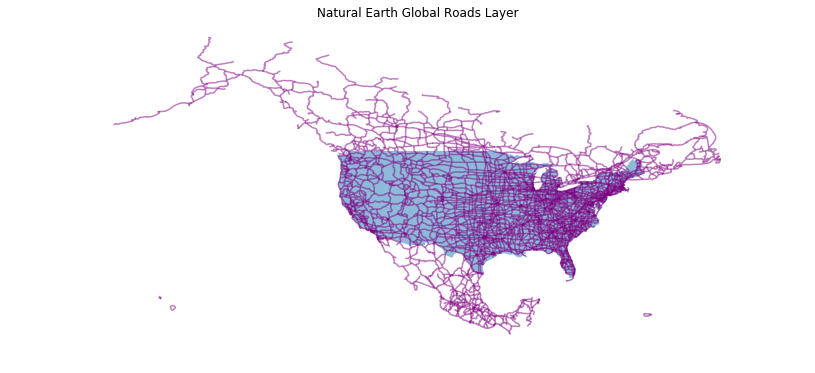

In [37]:
# Create x and y min and max objects to use in the plot boundaries
xmin, ymin, xmax, ymax = aoi_bounds

fig, ax = plt.subplots(figsize=(14,6))

country_boundary_us.plot(alpha = .5, ax = ax)
ne_roads.plot(color='purple', ax=ax, alpha=.5)

ax.set(title='Natural Earth Global Roads Layer')
ax.set_axis_off()
plt.axis('equal')

plt.show()


**Plot showing the North American roads overlaid on the continental US without x and y limits being set**

You can set the x and ylimits of the plot using the x and y min and max values from your bounds object that you created above to zoom in your map.

In [38]:
# Use the country boundary to set the min and max values for the plot
country_boundary_us.total_bounds


array([-124.725839,   24.498131,  -66.949895,   49.384358])

Notice in the plot below, you can still see roads that fall outside of the US Boundary area but are within the rectangular spatial extent of the boundary layer. Hopefully this helps you better understand the difference between clipping the data to a polygon shape vs simply plotting a small geographic region.

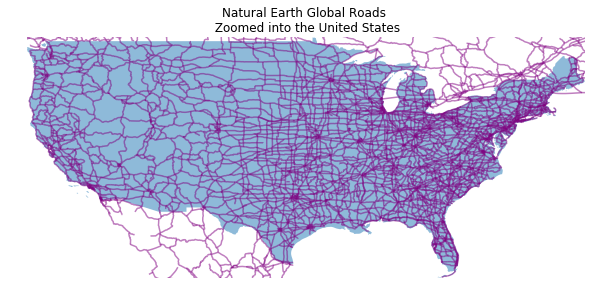

In [40]:
# Plot the data with a modified spatial extent
fig, ax = plt.subplots(figsize = (10,6))

xlim = ([country_boundary_us.total_bounds[0],  country_boundary_us.total_bounds[2]])
ylim = ([country_boundary_us.total_bounds[1],  country_boundary_us.total_bounds[3]])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

country_boundary_us.plot(alpha = .5, ax = ax)
ne_roads.plot(color='purple', ax=ax, alpha=.5)

ax.set(title='Natural Earth Global Roads \n Zoomed into the United States')
ax.set_axis_off()
plt.show()


**Plot showing the North American roads overlaid on the continental US with x and y limits being set to the extent of the US layer**

# Lesson 4. Create interactive leaflet maps using folium in Jupyter Notebook: GIS in Python
### Learning Objectives

    Create interactive plots of vector data using folium in Python and Jupyter Notebook.

# Create Interactive Map

Begin by importing the necessary packages including geopandas to import the vector data and folium to create the interactive map.

In [46]:
import os
import folium
import geopandas as gpd
import earthpy as et

# Get the data and set working directory
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Create interactive map with default basemap
map_osm = folium.Map(location=[45.5236, -122.6750])
map_osm


In [44]:
# Import SJER plot locations using geopandas
SJER_plot_locations_path = os.path.join("data", "spatial-vector-lidar", 
                                        "california", "neon-sjer-site", 
                                        "vector_data", "SJER_plot_centroids.shp")

SJER_plot_locations = gpd.read_file(SJER_plot_locations_path)

#Add Vector Data to Interactive Map

# Project to WGS 84 and save to json for plotting on interactive map
SJER_plot_locations_json = SJER_plot_locations.to_crs(epsg=4326).to_json()

# Create interactive map and add SJER plot locations
SJER_map = folium.Map([37.12, -119.737],
                  zoom_start=14)

points = folium.features.GeoJson(SJER_plot_locations_json)

SJER_map.add_child(points)
SJER_map



In [45]:
# Create interactive map with different basemap
SJER_map = folium.Map([37.12, -119.737],
                  zoom_start=14,
                  tiles='Stamen Terrain')

points = folium.features.GeoJson(SJER_plot_locations_json)

SJER_map.add_child(points)
SJER_map
